Boxplot demo

http://matplotlib.org/examples/statistics/boxplot_demo.html

In [10]:
import numpy as np
import holoviews as hv
hv.notebook_extension()

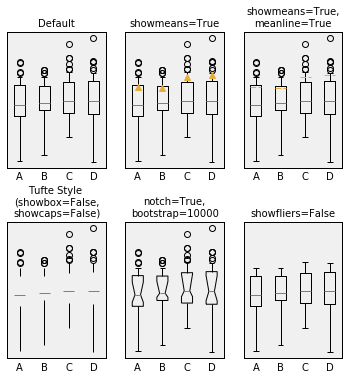

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# fake data
np.random.seed(937)
data = np.random.lognormal(size=(37, 4), mean=1.5, sigma=1.75)
labels = list('ABCD')
fs = 10  # fontsize

# demonstrate how to toggle the display of different elements:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 6), sharey=True)
axes[0, 0].boxplot(data, labels=labels)
axes[0, 0].set_title('Default', fontsize=fs)

axes[0, 1].boxplot(data, labels=labels, showmeans=True)
axes[0, 1].set_title('showmeans=True', fontsize=fs)

axes[0, 2].boxplot(data, labels=labels, showmeans=True, meanline=True)
axes[0, 2].set_title('showmeans=True,\nmeanline=True', fontsize=fs)

axes[1, 0].boxplot(data, labels=labels, showbox=False, showcaps=False)
tufte_title = 'Tufte Style \n(showbox=False,\nshowcaps=False)'
axes[1, 0].set_title(tufte_title, fontsize=fs)

axes[1, 1].boxplot(data, labels=labels, notch=True, bootstrap=10000)
axes[1, 1].set_title('notch=True,\nbootstrap=10000', fontsize=fs)

axes[1, 2].boxplot(data, labels=labels, showfliers=False)
axes[1, 2].set_title('showfliers=False', fontsize=fs)

for ax in axes.flatten():
    ax.set_yscale('log')
    ax.set_yticklabels([])

fig.subplots_adjust(hspace=0.4)

:GridMatrix   [X,Y]
   :BoxWhisker   [Labels]   (y)
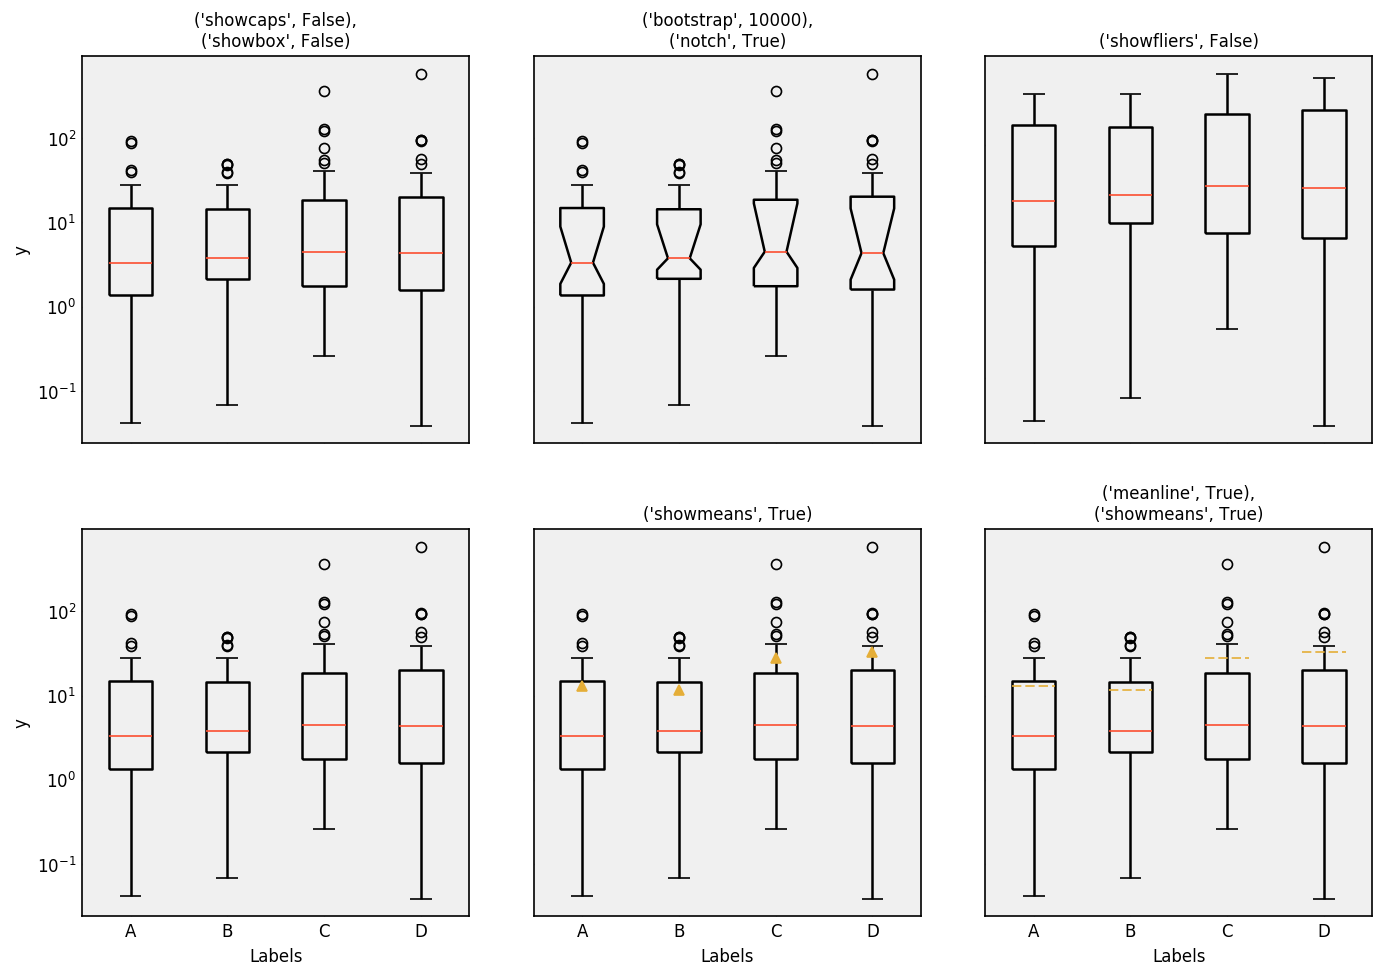

In [11]:
%%output dpi=120
%%opts BoxWhisker [logy=True show_title=True] GridMatrix [show_title=False fig_inches=8]

np.random.seed(937)
data = np.random.lognormal(size=(37, 4), mean=1.5, sigma=1.75)
labels = list('ABCD')*37

gm = hv.GridMatrix()
boxplot = hv.BoxWhisker((labels, data.flatten()), kdims=['Labels'], vdims=[], label='Default')
opts = [dict(), dict(showmeans=True), dict(showmeans=True, meanline=True),
        dict(showbox=False, showcaps=False), dict(notch=True, bootstrap=10000),
       dict(showfliers=False)]

for i, opt in enumerate(opts):
    gm[(i%3, i//3)] = boxplot.relabel(',\n'.join(map(str, opt.items())))(style=opt)
gm